`page 121`

# Chapter 3

## Exercise 8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
auto = sm.datasets.get_rdataset('Auto', package='ISLR').data
auto.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino
6,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
7,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
8,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
9,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
10,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [3]:
auto.shape

(392, 9)

In [4]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [234]:
# Using the R-styles formulas with statsmodel.formula.api
model = ols('mpg ~ horsepower', data=auto).fit()

# Print summary stats
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           7.03e-81
Time:                        17:18:17   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

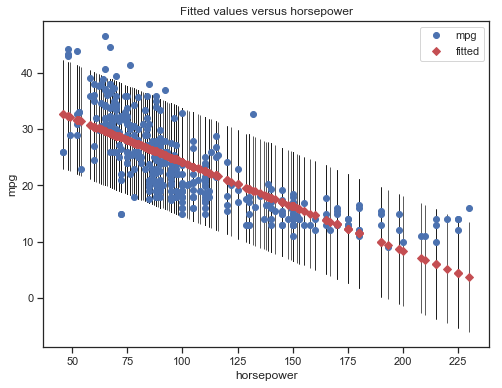

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
fig = sm.graphics.plot_fit(model, 'horsepower', ax=ax)

1. There is statisticaly significant relationship between `mpg` and `horsepower`: $p$-value is less than `0.05` and $F$-statistic is a large value. This means we can reject the null hypothesis $H_0$ that there is no relationship.
2. $R_2$ is `0.606`, meaning `60.6%` of variability in `Y = mpg` is explained by `X = horsepower`. (see MSE below)
2. Negative. Coeff is negative. As `horsepower` increases, `mpg` decreases.

In [7]:
# Mean squared error (MSE)
model.mse_resid

24.06645095367287

(iv)....

In [8]:
pred = model.get_prediction(auto[auto['horsepower'] == 98])
pred.summary_frame(alpha=0.05)

# Appears to be 2 entries where 'horsepower' == 98

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758
1,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


 `mean-ci-lower` is confidence interval, and `obs-ci-lower` is prediction interval. Confidence interval is given by $ \hat{y}_p \pm t_{a/2}s_{\hat{y}_p}$ and prediction interval is given by  $ \hat{y}_p \pm t_{a/2}s_{ind}$

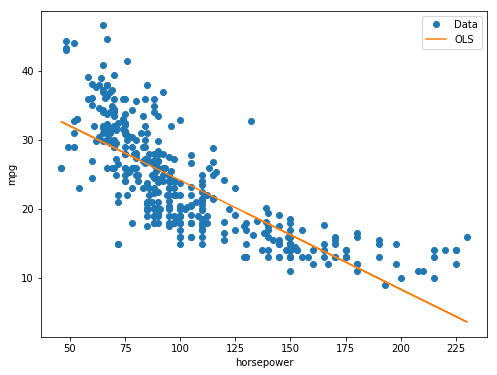

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(auto['horsepower'], auto['mpg'], 'o', label='Data')
ax.plot(auto['horsepower'], model.fittedvalues, label='OLS')
plt.xlabel('horsepower')
plt.ylabel('mpg')
ax.legend(loc='best')
plt.show()

In [327]:
def diag_plots(model, data):
    """ Takes a fitted model and dataframe and returns R-style diagnostic plots """
    fig, axes = plt.subplots(figsize=(15, 8), nrows=2, ncols=2)
    ax1, ax2, ax3, ax4 = axes.flatten()

    sns.residplot(model.fittedvalues, model.resid, lowess=True, line_kws={'color':'red'}, ax=ax1)
    # ax1.set_title('Residuals vs Fitted')
    ax1.set_xlabel('Fitted Values')
    ax1.set_ylabel('Residuals')

    sm.qqplot(auto['mpg'], line='r', ax=ax2)

    sns.regplot(model.fittedvalues, np.array(np.sqrt(abs(model.resid))), lowess=True, line_kws={'color':'red'}, ax=ax3)
    ax3.set_xlabel('Fitted Values')
    ax3.set_ylabel(r'$\sqrt{|Standardized Residuals|}$')

    standard_resid = model.get_influence().summary_frame()['standard_resid']
    leverage = model.get_influence().hat_matrix_diag
    sns.regplot(leverage, standard_resid, lowess=True, line_kws={'color':'red'}, ax=ax4)
    ax4.set_xlim(0, max(leverage)+0.005)
    ax4.set_xlabel('Leverage')
    ax4.set_ylabel('Standardized Residuals')

    plt.subplots_adjust(hspace=0.35)
    plt.show()

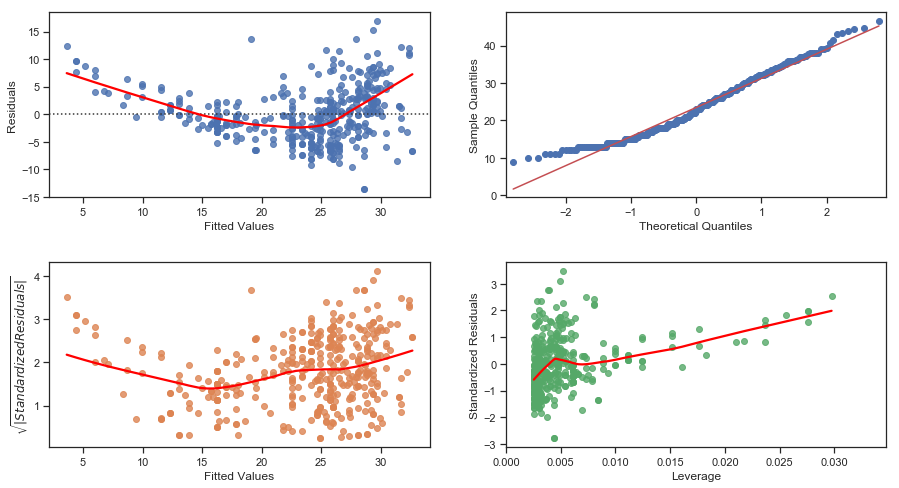

In [274]:
diag_plots(model, auto)

Seems like some non-linearity exists. Also heteroskedacity. There are points with standardized residuals > 3, which means outliers.

* * *

# Exercise 9

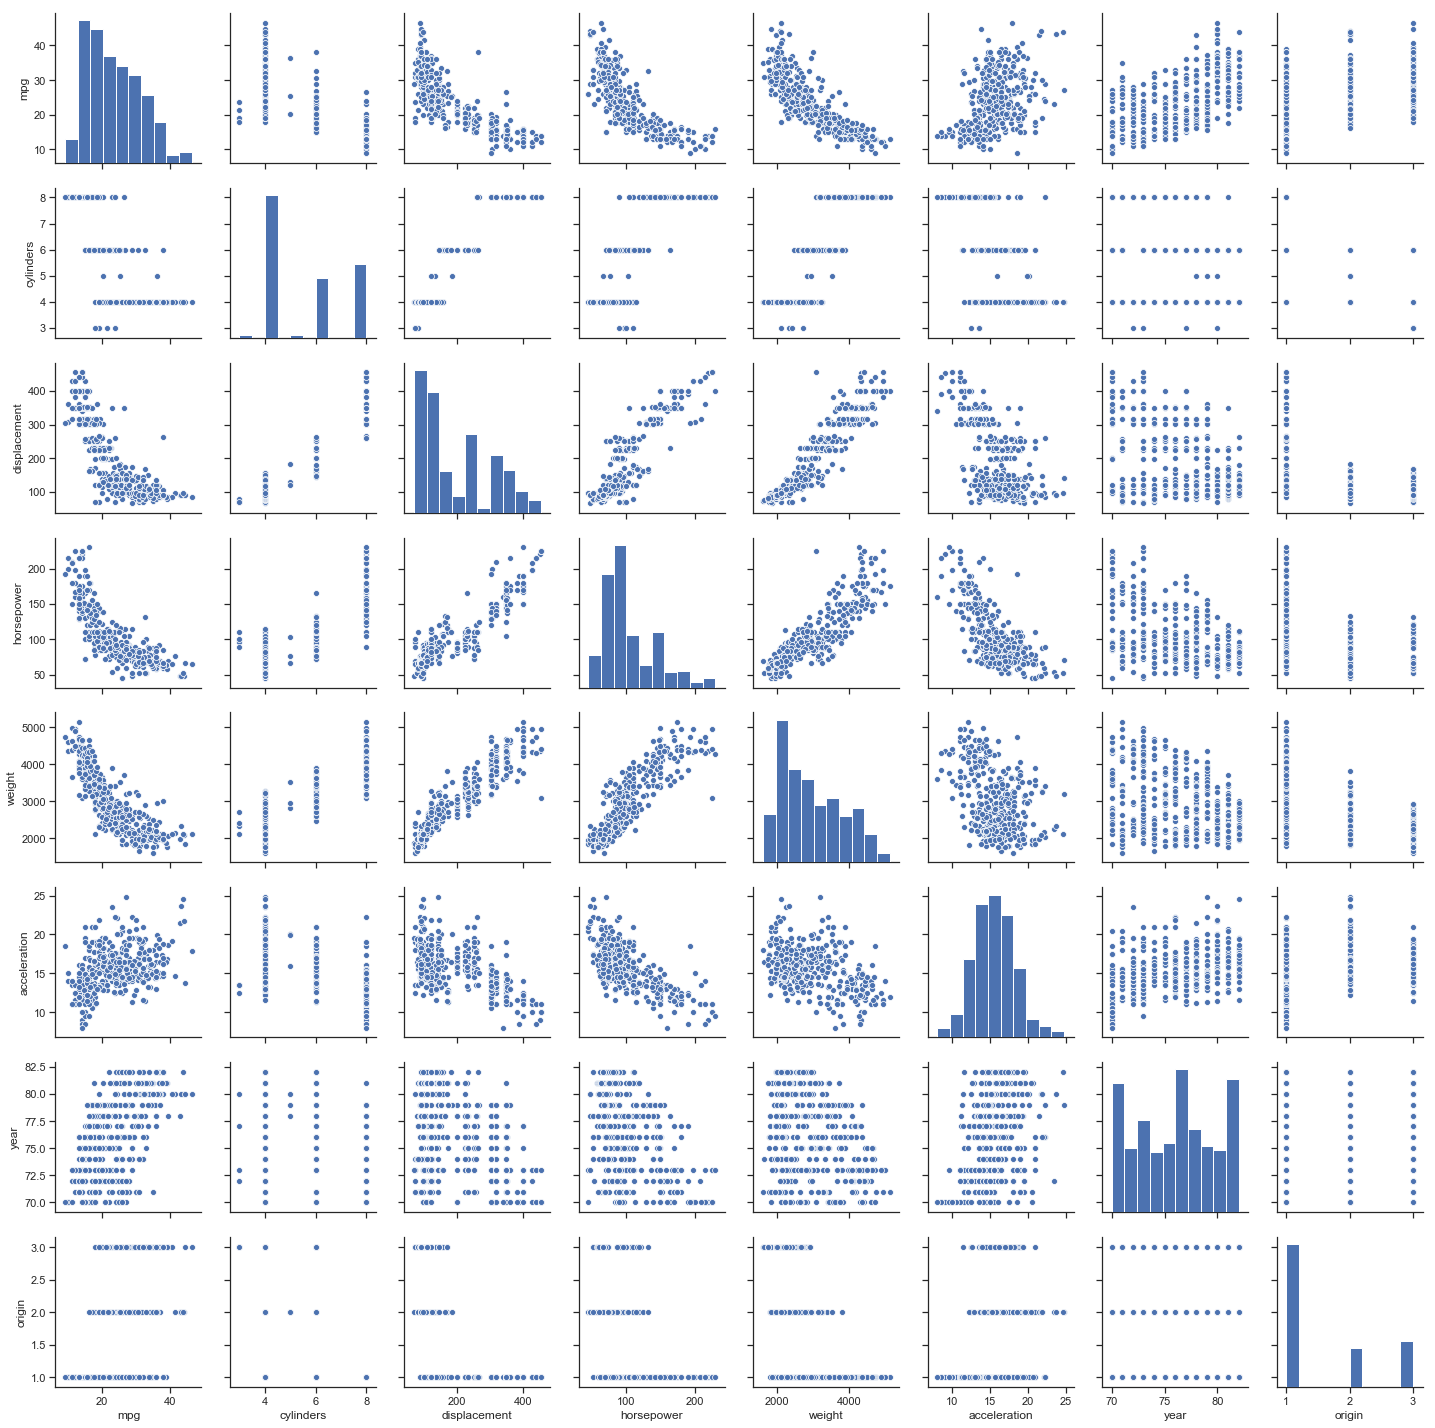

In [30]:
sns.set(style='ticks')
sns.pairplot(auto)

In [33]:
# Correlation matrix
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [38]:
# Get all column names except response (mpg) and name (qualitative)
all_columns = "+".join(auto.columns.difference(['mpg', 'name']))
multiple_lm = ols(('mpg ~ ' + all_columns), data=auto).fit()
print(multiple_lm.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.818    
Dependent Variable: mpg              AIC:                2062.9495
Date:               2019-02-07 09:55 BIC:                2094.7196
No. Observations:   392              Log-Likelihood:     -1023.5  
Df Model:           7                F-statistic:        252.4    
Df Residuals:       384              Prob (F-statistic): 2.04e-139
R-squared:          0.821            Scale:              11.073   
------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
Intercept        -17.2184   4.6443 -3.7074 0.0002 -26.3499 -8.0870
acceleration       0.0806   0.0988  0.8152 0.4155  -0.1138  0.2749
cylinders         -0.4934   0.3233 -1.5261 0.1278  -1.1290  0.1422
displacement       0.0199   0.0075  2.6474 0.0084   0.0051  0.0347
horsepower   

#### (c)
1. Yes. The $F$-statistic is large, which means we can reject $H_0$ that there is no relationship between response and predictors. `displacement`, `weight`, `origin`, and `year` have small $p$-values, which gives support to $H_a$.
2. `displacement`, `weight`, `origin`, and `year`.
2. There has been progressive improvement in `mpg` over the years. i.e. cars have become more fuel efficient every year by a factor of `0.7508`. Another way to put it: An improvement of $1$ additional mpg came every $0.7508$ years.

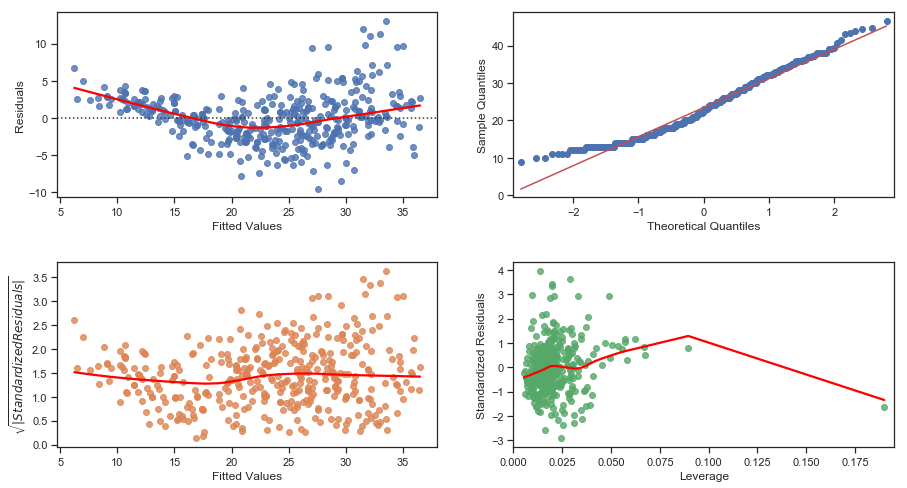

In [275]:
diag_plots(multiple_lm, auto)

**Note:** There is a [difference between studentized and standardized](https://stats.stackexchange.com/questions/99717/whats-the-difference-between-standardization-and-studentization) residuals.

A point appears with high leverage, which is [cause for concern](https://stats.stackexchange.com/questions/208242/hat-matrix-and-leverages-in-classical-multiple-regression) since it may invalidate the fit. We can get specific values for "leverage statistic":

In [325]:
pd.Series({'Mean leverage of all data: ': np.mean(multiple_lm.get_influence().hat_matrix_diag),
                'Median leverage: ': np.median(multiple_lm.get_influence().hat_matrix_diag),
                'Highest leverage observed: ': max(multiple_lm.get_influence().hat_matrix_diag)}).map('{:,.3f}'.format)

Mean leverage of all data:     0.020
Median leverage:               0.018
Highest leverage observed:     0.190
dtype: object

So an observations seems to have a very high leverage statistic of $13$ compared to mean leverage of $0.20$. But does not have high residual.

There appear to be outliers in the data. These aare observations with standardized values greater than $3$.

#### 9(d): Interaction terms

Use the correlation matrix to find predictors that appear to be correlated and create model with these. By "hierarchical princple", the *main effects* associated with the interation terms should also be added to the model. Statmodels' `ols` does this automatically.

In [160]:
cols_for_model2 = "+".join(auto.columns.difference(['mpg', 'name', 'cylinders', 'acceleration', 'origin']))

model2 = ols('mpg ~ displacement * weight +' + cols_for_model2, data=auto).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     461.4
Date:                Thu, 07 Feb 2019   Prob (F-statistic):          2.44e-160
Time:                        12:45:11   Log-Likelihood:                -980.45
No. Observations:                 392   AIC:                             1973.
Df Residuals:                     386   BIC:                             1997.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.8328    

After experimenting with variables, I found that `model2`, which inlcudes the interaction term `displacement x weight` gives a slightly higher $R_2$ and $F$-statistic values, providing evidence of a better fit than the additive `multiple_lm` model above.

$R_2$ of `multiple_lm` = $82.1\%$  
$R_2$ of `model2` = $85.8\%$  
$n$ = 392

Thus $\dfrac{85.8 - 82.1}{100-82.1} \approx 20.7\%$ of the variability in `mpg` that remains after fitting the additive model has been explained by the interaction term `displacement x weight`.

> _**Note:** Values might differ from the summary stats coz I did further experimentation with the models._

#### Polynomial regression

Can look at scatter matrix to see which predictors appear to have non-linear relationships.

In [223]:
# Take log of response to remove heteroskedacity
poly_model = ols('np.log(mpg) ~ np.square(displacement) + displacement * weight +' + cols_for_model2, data=auto).fit()
print(poly_model.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(mpg)   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     532.6
Date:                Thu, 07 Feb 2019   Prob (F-statistic):          5.49e-183
Time:                        13:27:20   Log-Likelihood:                 304.22
No. Observations:                 392   AIC:                            -594.4
Df Residuals:                     385   BIC:                            -566.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

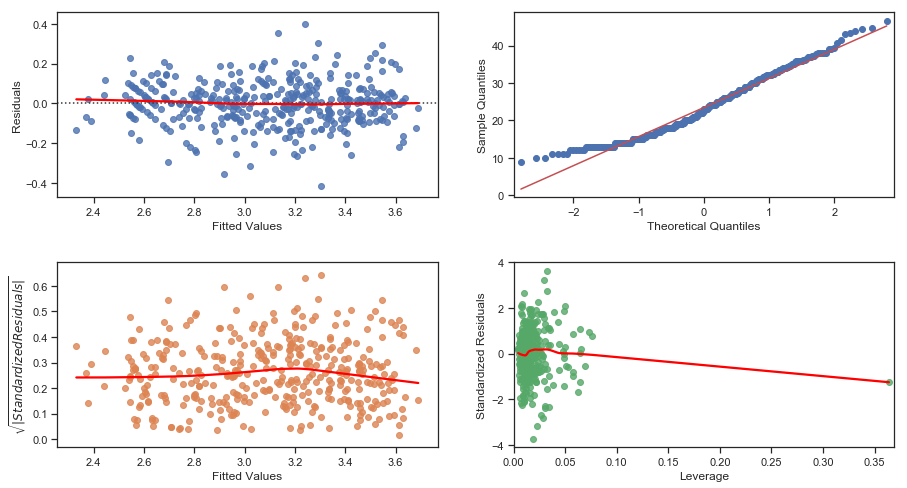

In [276]:
diag_plots(poly_model, auto)

Final best fit model:
$$ log(mpg) = 2.46 - 0.0041 \times horsepower + 0.0034 \times displacement + 0.0304 \times year - 0.0002 \times weight - 0.0296 \times {displacement}^2 + 4.008\text{e-}07 \times (displacement \times weight) $$

* * *

## Exercise 10

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [228]:
carseats = sm.datasets.get_rdataset('Carseats', package='ISLR').data
carseats.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


#### **Caution!** Models and vars from here on down will overwrite the ones above

In [278]:
model = ols('Sales ~ Price + Urban + US', data=carseats).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           2.39e-23
Time:                        22:34:26   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

There is a statistically significant relationship between `Price` and the response, and its negative. Meaning `Sales` decrease with increase in `Price`. There isn't a relationship between reponse and `Urban`. The $p$-value associated with $t$-statistic of `US` indicates it has a statistically significant relationship with the reponse; `Sales` increase by $1,201$ unit if the store is in US. 

Mathematically,

$$ Sales = 13.0435 + -0.0545 \times Price + -0.0219 \times Urban + 1.2006 US $$

\begin{equation*}
\text{where Urban} =
\begin{cases}
1, & \text{store in urban location}; \\
0, & \text{otherwise}.
\end{cases}
\end{equation*}

\begin{equation*}
\text{and US} =
\begin{cases}
1, & \text{store is in the US}; \\
0, & \text{otherwise}.
\end{cases}
\end{equation*}

In [281]:
model2 = ols('Sales ~ Price + US', data=carseats).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           2.66e-24
Time:                        23:02:40   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

In [292]:
print('Mean squared errors\nmodel: {:.2f}\nmodel2: {:.2f}'.format(model.mse_resid, model2.mse_resid))

Mean squared errors
model: 6.11
model2: 6.10


The models are mostly similar, based on $F$-statistic and MSE values. The second model is *slightly* better.

In [318]:
# Confidence intervals
print(model2.conf_int(alpha=0.05))

                  0          1
Intercept  11.79032  14.271265
US[T.Yes]   0.69152   1.707766
Price      -0.06476  -0.044195


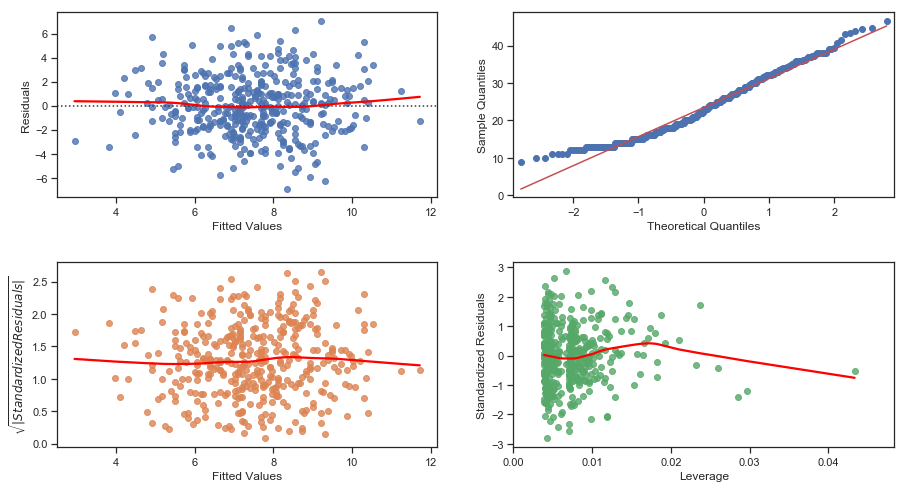

In [319]:
diag_plots(model2, carseats)

Standardized residuals are bounded in $+3,-3$ range, so no evidence of outliers.

Average leverage statistic for all observations is given by $\dfrac{p+1}{n}=0.0075$ for `model2`. So there are quite a few observation with high leverage, with the maximum being:

In [326]:
max(model2.get_influence().hat_matrix_diag)

0.043337657037178824

* * *

## Exercise 11

In [331]:
# Generate data
import random
random.seed(1)
x = np.random.normal(size=100)
y = 2*x + np.random.normal(size=100)

#### **Caution!** Vars and models below overwrite previous ones.

In [369]:
# Alternatively, could use df = pd.DataFrame(pd.np.column_stack([y, x]), columns=['y', 'x'])
# to create a df and use R-style lm.fit()

model = sm.OLS(y, x, hasconst=False).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     578.8
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           3.81e-43
Time:                        00:57:45   Log-Likelihood:                -137.54
No. Observations:                 100   AIC:                             277.1
Df Residuals:                      99   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0976      0.087     24.059      0.0

In [359]:
# Standard error
print(model.bse)

array([0.08718896])

See [here](https://stackoverflow.com/questions/31523921/print-std-err-value-from-statsmodels-ols-results) for `model.bse`. [statsmodels documentation](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.html) says `bse` is "standard error of parameter estimates."

Coefficient is large relative to standard error. $p$-value is small and is associated with a relatively large $t$-statistic. So $H_0$ can be rejected.

In [368]:
model2 = sm.OLS(x, y, hasconst=False).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     578.8
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           3.81e-43
Time:                        00:45:25   Log-Likelihood:                -55.562
No. Observations:                 100   AIC:                             113.1
Df Residuals:                      99   BIC:                             115.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4071      0.017     24.059      0.0

Both models reflect the same line. i.e. $y = 2x + \epsilon$ is equivalent to $ x = 0.5 \times (y-\epsilon).$

***

> Skipped some boring questions.

## Exercise 13

The model:
$ Y = -1 + 0.5X + \epsilon $

In [370]:
random.seed(1)
x = np.random.normal(0, 1, size=100)
eps = np.random.normal(0, 0.25, size=100)
y = -1 + 0.5*x + eps

In [374]:
# length
y.size

100

In [378]:
# alternative
len(y)

100

$\beta_0 = -1 \text{ and } \beta_1 = 0.5$

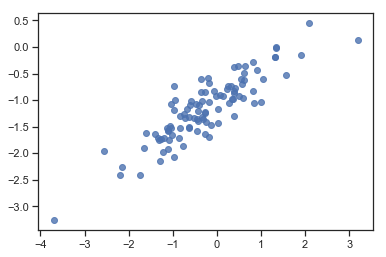

In [380]:
sns.regplot(x, y, fit_reg=False)
plt.show()

> Skipped boring questions

***

## Exercise 14

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
import random
random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5*x1 + np.random.normal(size=100)/10
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size=100)

Form of the linear model:
$ y = 2 + 2x_1 + 0.3x_2 + \epsilon $

In [3]:
# Couple of ways to get the correlation (Pearson)
# Numpy's corrcoef
np.corrcoef(x1, x2)      #can index with [0, 1]

array([[1.        , 0.85859044],
       [0.85859044, 1.        ]])

In [4]:
# Scipy's pearsonr. Returns corrcoef and p-value for testing non-correlation
from scipy.stats.stats import pearsonr
pearsonr(x1, x2)

(0.8585904385093234, 3.414752392274423e-30)

Can also do this R-style with the [rpy2](https://rpy2.readthedocs.io/en/version_2.8.x/) package, which provides an interface to R running embedded in a Python process.

[rpy2 Github repo](https://github.com/conda-forge/rpy2-feedstock)

In [6]:
# R-style corrcoef with the rpy2 package
from rpy2.robjects.vectors import FloatVector
from rpy2.robjects.packages import importr

rstats = importr('stats')
rstats.cor(FloatVector(x1), FloatVector(x2))


0.858590


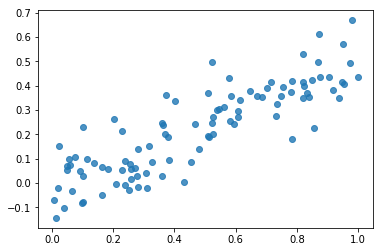

In [9]:
sns.regplot(x1, x2, fit_reg=False)
plt.show()

In [30]:
X = np.column_stack([x1, x2])
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     10.02
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           0.000111
Time:                        12:22:28   Log-Likelihood:                -152.03
No. Observations:                 100   AIC:                             310.1
Df Residuals:                      97   BIC:                             317.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0663      0.215      9.610      0.0

$p$-values are greater than $a = 0.05$ which means cannot reject $H_0: \beta_p = 0$ for both coeffs. This is of course wrong because of presence of *collinearity*. Standard errors are also high.

In [38]:
model2 = sm.OLS(y, X[:,:2]).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     18.34
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           4.32e-05
Time:                        12:32:22   Log-Likelihood:                -152.85
No. Observations:                 100   AIC:                             309.7
Df Residuals:                      98   BIC:                             314.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0234      0.213      9.502      0.0

Now $p\text{-value} < 5\%$ (statistically significant) and $\hat{\beta}_1$ is closer to the true $\beta_1 = 2$. The null hypothesis $H_0: \beta_1 = 0$ can now be rejected, which contradicts results from the previous `model` that had collinear vars.

In [44]:
boston = pd.read_csv('data/Boston.csv', index_col=0)
boston.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


## $Fin$